# 1. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import re
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rcParams['font.family'] = 'Malgun Gothic'
rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 12.0, 'axes.titlesize': 20}
plt.rcParams.update(**rc)
mpl.rcParams['axes.unicode_minus'] = False
os.getcwd()

'D:\\kaggle\\ELO'

# 2. 데이터 로드
* train.csv: 학습 데이터
* test.csv: 테스트 데이터

* sample_submission.csv: 제출 예시 데이터

* historical_transactions.csv: 상인 거래 데이터(옛날)
* new_merchant_transactions.csv: 상인 거래 데이터(최신) 

* merchants.csv: 상인관련 지표 데이터

* Data_Dictionary.xlsx: 데이터 설명 엑셀

In [2]:
%%time
train=pd.read_csv("D:/kaggle/ELO/data/train.csv",encoding='utf-8')
test=pd.read_csv("D:/kaggle/ELO/data/test.csv",encoding='utf-8')

sample_sub=pd.read_csv("D:/kaggle/ELO/data/sample_submission.csv",encoding='utf-8')

history_trans=pd.read_csv("D:/kaggle/ELO/data/historical_transactions.csv",encoding='utf-8')
new_merchant=pd.read_csv("D:/kaggle/ELO/data/new_merchant_transactions.csv",encoding='utf-8')

merchant=pd.read_csv("D:/kaggle/ELO/data/merchants.csv",encoding='utf-8')

Wall time: 59.9 s


In [3]:
train_dic=pd.read_excel("D:/kaggle/ELO/data/Data_Dictionary.xlsx",sheet_name = 'train')
his_dic=pd.read_excel("D:/kaggle/ELO/data/Data_Dictionary.xlsx",sheet_name = 'history')
new_merchant_dic=pd.read_excel("D:/kaggle/ELO/data/Data_Dictionary.xlsx",sheet_name = 'new_merchant_period')
merchant_dic=pd.read_excel("D:/kaggle/ELO/data/Data_Dictionary.xlsx",sheet_name = 'merchant')

In [13]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


# EDA 
## 1. train/test

In [14]:
train.head()
#train.info()

#test.head()
#test.info()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


### first_active_month 

[Text(0, 0, '2011-11'),
 Text(0, 0, '2011-12'),
 Text(0, 0, '2012-02'),
 Text(0, 0, '2012-03'),
 Text(0, 0, '2012-04'),
 Text(0, 0, '2012-05'),
 Text(0, 0, '2012-06'),
 Text(0, 0, '2012-07'),
 Text(0, 0, '2012-08'),
 Text(0, 0, '2012-09'),
 Text(0, 0, '2012-10'),
 Text(0, 0, '2012-11'),
 Text(0, 0, '2012-12'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-05'),
 Text(0, 0, '2013-06'),
 Text(0, 0, '2013-07'),
 Text(0, 0, '2013-08'),
 Text(0, 0, '2013-09'),
 Text(0, 0, '2013-10'),
 Text(0, 0, '2013-11'),
 Text(0, 0, '2013-12'),
 Text(0, 0, '2014-01'),
 Text(0, 0, '2014-02'),
 Text(0, 0, '2014-03'),
 Text(0, 0, '2014-04'),
 Text(0, 0, '2014-05'),
 Text(0, 0, '2014-06'),
 Text(0, 0, '2014-07'),
 Text(0, 0, '2014-08'),
 Text(0, 0, '2014-09'),
 Text(0, 0, '2014-10'),
 Text(0, 0, '2014-11'),
 Text(0, 0, '2014-12'),
 Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '201

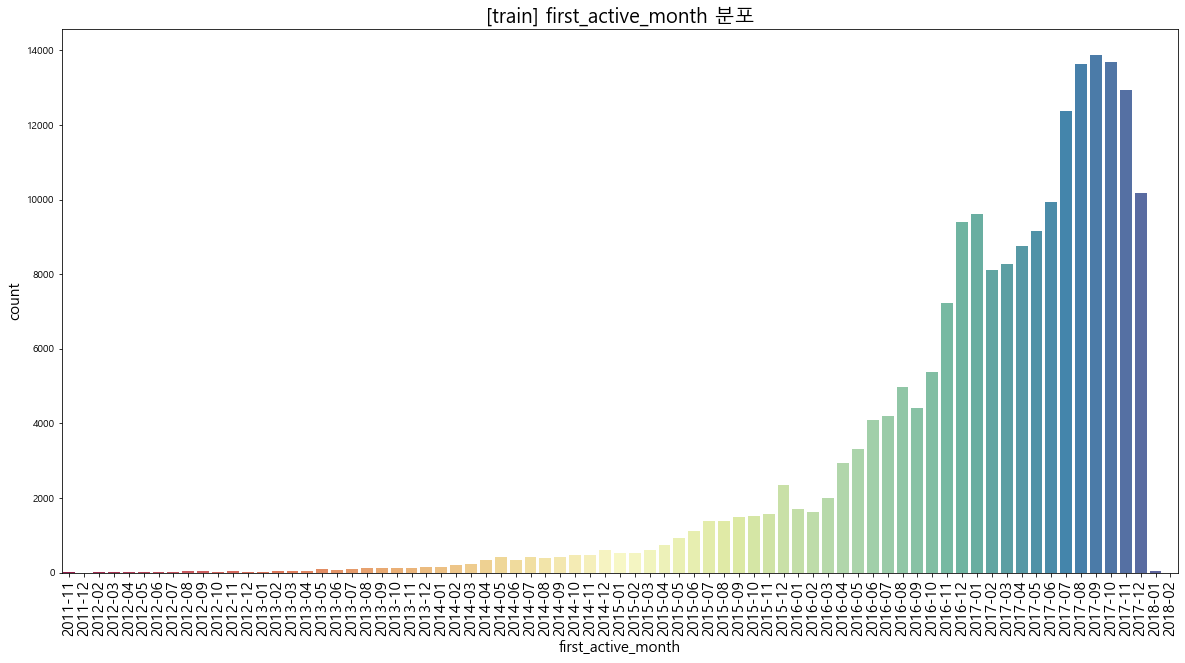

In [5]:
### first_active_month 
plt.figure(figsize=(20,10))
plt.title("[train] first_active_month 분포",size=20)
first_active_month=sns.countplot(x=train.first_active_month,palette='Spectral',
            order = np.sort(train.first_active_month.value_counts().index))
first_active_month.set_xticklabels(first_active_month.get_xticklabels(), rotation=90, size=15)

[Text(0, 0, '2011-11'),
 Text(0, 0, '2011-12'),
 Text(0, 0, '2012-01'),
 Text(0, 0, '2012-02'),
 Text(0, 0, '2012-03'),
 Text(0, 0, '2012-04'),
 Text(0, 0, '2012-05'),
 Text(0, 0, '2012-06'),
 Text(0, 0, '2012-07'),
 Text(0, 0, '2012-08'),
 Text(0, 0, '2012-09'),
 Text(0, 0, '2012-10'),
 Text(0, 0, '2012-11'),
 Text(0, 0, '2012-12'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-05'),
 Text(0, 0, '2013-06'),
 Text(0, 0, '2013-07'),
 Text(0, 0, '2013-08'),
 Text(0, 0, '2013-09'),
 Text(0, 0, '2013-10'),
 Text(0, 0, '2013-11'),
 Text(0, 0, '2013-12'),
 Text(0, 0, '2014-01'),
 Text(0, 0, '2014-02'),
 Text(0, 0, '2014-03'),
 Text(0, 0, '2014-04'),
 Text(0, 0, '2014-05'),
 Text(0, 0, '2014-06'),
 Text(0, 0, '2014-07'),
 Text(0, 0, '2014-08'),
 Text(0, 0, '2014-09'),
 Text(0, 0, '2014-10'),
 Text(0, 0, '2014-11'),
 Text(0, 0, '2014-12'),
 Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '201

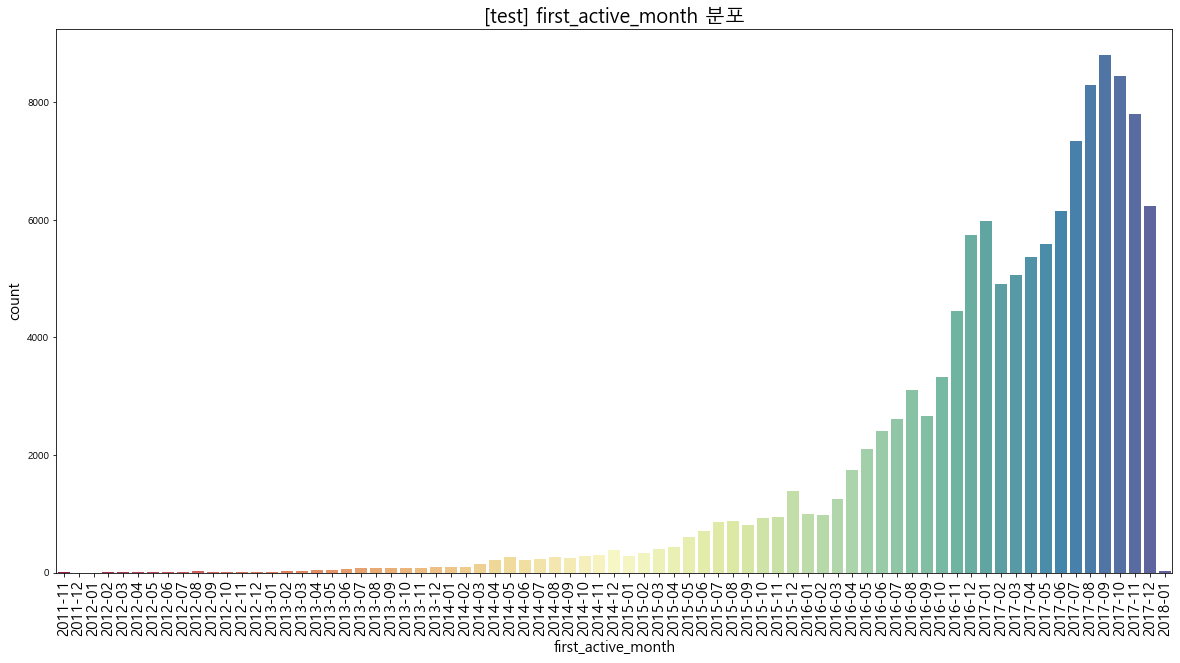

In [6]:
### first_active_month 
plt.figure(figsize=(20,10))
plt.title("[test] first_active_month 분포",size=20)
first_active_month=sns.countplot(x=test.first_active_month,palette='Spectral',
            order = np.sort(test.first_active_month.value_counts().index))
first_active_month.set_xticklabels(first_active_month.get_xticklabels(), rotation=90, size=15)

### feature 1/2/3

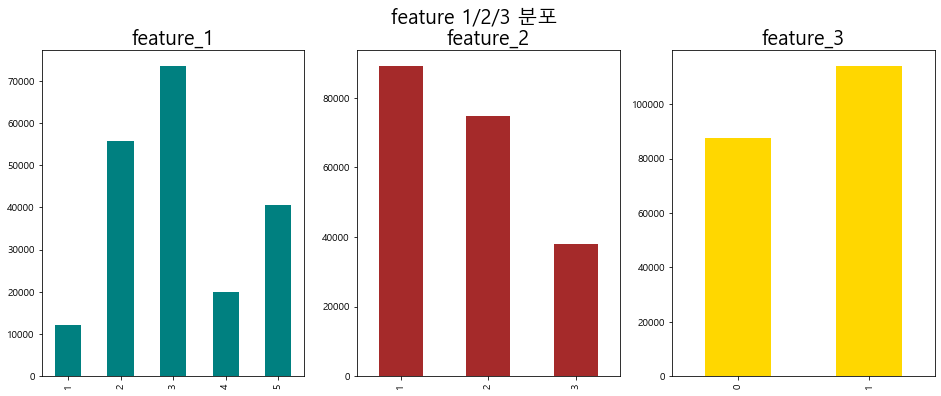

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('feature 1/2/3 분포',size=20);

### target

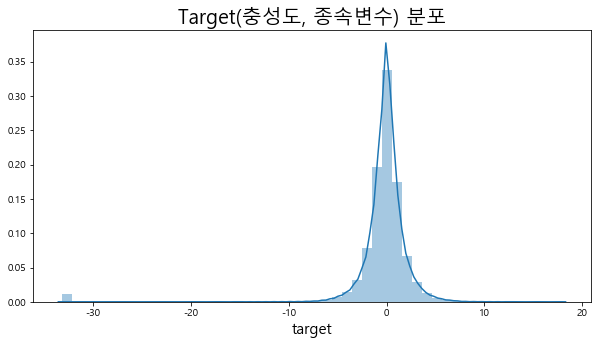

In [8]:
plt.figure(figsize=(10,5))
plt.title("Target(충성도, 종속변수) 분포",size=20)
sns.distplot(train.target)

In [9]:
print('-30 이하 target 값은 {} 개.'.format(len(train.loc[train.target < -30])))

-30 이하 target 값은 2207 개.


## 2. transactions(historical / new)

In [10]:
history_trans.head()
history_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [11]:
colname=[]
na_count=[]

for column in history_trans.columns.values:
    colname.append(column)
    na_count.append(history_trans['{}'.format(column)].isna().sum())
    
                    
col=pd.DataFrame(colname,columns=['열이름'])
count=pd.DataFrame(na_count,columns=['NA개수'])


na_df=pd.concat([col,count],axis=1)
na_df['NA비율(%)']=na_df['NA개수']/len(history_trans.card_id)*100
na_df

,열이름,NA개수,NA비율(%)
0,authorized_flag,0,0.000000
1,card_id,0,0.000000
2,city_id,0,0.000000
3,category_1,0,0.000000
4,installments,0,0.000000
5,category_3,178159,0.611970
6,merchant_category_id,0,0.000000
7,merchant_id,138481,0.475678
8,month_lag,0,0.000000
9,purchase_amount,0,0.000000


In [12]:
year=history_trans.purchase_date[]
month=
print('Purchase date 기간:',min(history_trans.purchase_date),'~',max(history_trans.purchase_date))

SyntaxError: invalid syntax (<ipython-input-12-88db94e0bbd9>, line 1)

### month_lag

In [ ]:
### first_active_month 
plt.figure(figsize=(5,5))
plt.title("month_lag 분포",size=20)
month_lag=sns.countplot(x=history_trans.month_lag,palette='Spectral')
#first_active_month.set_xticklabels(first_active_month.get_xticklabels(), rotation=90, size=15)

### authorized_flag

In [ ]:
### authorized_flag
plt.figure(figsize=(5,5))
plt.title("authorized_flag 분포",size=20)
authorized_flag=sns.countplot(x=history_trans.authorized_flag,palette='Set1')
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

In [ ]:
print(len(history_trans.loc[history_trans.authorized_flag=='Y']))
print(len(history_trans.loc[history_trans.authorized_flag!='Y']))

### category_3

In [ ]:
### category_3
plt.figure(figsize=(5,5))
plt.title("category_3 분포",size=20)
category_3=sns.countplot(x=history_trans.category_3,palette='Set1')
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

In [ ]:
history_trans.category_3.isna().sum()

### installments

In [ ]:
### installments
plt.figure(figsize=(5,5))
plt.title("installments 분포",size=20)
installments=sns.countplot(x=history_trans.installments,palette='Set1')
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

### category_1

In [ ]:
### category_1
plt.figure(figsize=(5,5))
plt.title("category_1 분포",size=20)
category_1=sns.countplot(x=history_trans.category_1,palette='Set1')
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

### merchant_category_id

In [ ]:
### merchant_category_id
plt.figure(figsize=(5,150))
plt.title("merchant_category_id 분포",size=20)
merchant_category_id=sns.countplot(y=history_trans.merchant_category_id,palette='Set1')
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

In [ ]:
pd.DataFrame(history_trans.merchant_category_id.value_counts())

### subsector_id

In [ ]:
### subsector_id
plt.figure(figsize=(5,8))
plt.title("subsector_id 분포",size=20)
subsector_id=sns.countplot(y=history_trans.subsector_id,palette='Set1')
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

In [ ]:
pd.DataFrame(history_trans.subsector_id.value_counts())

In [ ]:
print(len(history_trans.subsector_id.value_counts()))

### merchant_id

In [ ]:
pd.DataFrame(history_trans.merchant_id.value_counts())

In [ ]:
history_trans.merchant_id.isna().sum()

### purchase_amount

In [ ]:
pd.DataFrame(history_trans.purchase_amount.value_counts())

In [ ]:
print('표준화된 구매량 : 최소 {}회 ~ 최대 {}회'.
      format(min(history_trans.purchase_amount),max(history_trans.purchase_amount)))

In [ ]:
history_trans.purchase_amount.isna().sum()

### city_id

In [ ]:
pd.DataFrame(history_trans.city_id.value_counts())

In [ ]:
history_trans.city_id.isna().sum()

In [ ]:
### city_id
plt.figure(figsize=(5,5))
plt.title("city_id 분포(top10 만)",size=20)
city_id=sns.countplot(x=history_trans.city_id,palette='Set1',
                     order=history_trans.city_id.value_counts().index[0:10])
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

### state_id

In [ ]:
pd.DataFrame(history_trans.state_id.value_counts())

In [ ]:
history_trans.city_id.isna().sum()

In [ ]:
len(history_trans.state_id.value_counts())

In [ ]:
### state_id
plt.figure(figsize=(15,5))
plt.title("state_id 분포",size=20)
state_id=sns.countplot(x=history_trans.state_id,palette='Set1',
                     order=history_trans.state_id.value_counts().index)
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

### category_2

In [ ]:
pd.DataFrame(history_trans.category_2.value_counts())

In [ ]:
### category_2
plt.figure(figsize=(5,5))
plt.title("category_2 분포",size=20)
category_2=sns.countplot(x=history_trans.category_2,palette='Set1',
                     order=history_trans.category_2.value_counts().index)
#city_id.set_xticklabels(city_id.get_xticklabels(), rotation=90, size=15)

## 3. merchants